In [2]:
import yfinance as yf #Yahoo finance librería
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [9]:
# Lista de símbolos de las acciones que deseas obtener
symbols = ['AAPL', 'CRM', 'NKE', 'JPM', 'TSLA', 'PEP', 'AMGN', 'VZ', 'HD', 'BA', 'ABBV', 'GOOGL', 'WMT', 'CVX', 'CSCO', 'ADBE', 'QCOM', 'PG', 'HON', 'UNH', 'NFLX', 'XOM', 'ORCL']

# Descargar datos de Yahoo Finance
data = yf.download(symbols, start="2020-10-01", end="2024-03-30")
#print(data.columns) para revisar las columbnas

# Obtener los precios de cierre
closing_prices = data['Close']

# Calcular los rendimientos diarios con logaritmo natural
log_returns = np.log(closing_prices / closing_prices.shift(1))

# Calcular la matriz de covarianza
cov_matrix = log_returns.cov()

# Definir la tasa libre de riesgo (puedes ajustarla según tus necesidades) Tbill 3 añ
risk_free_rate = 0.0389







[*********************100%***********************]  23 of 23 completed


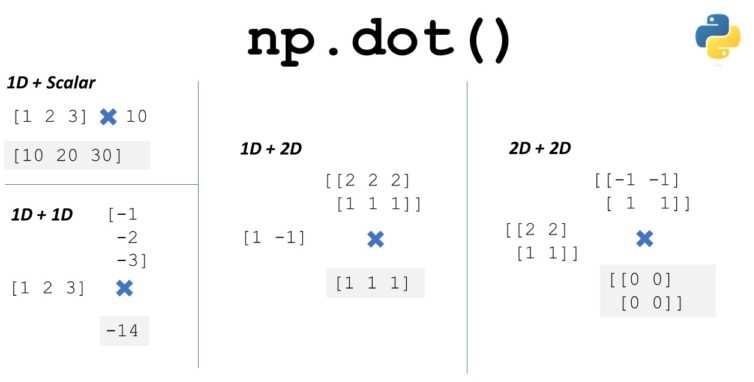

In [10]:
# Función para calcular el rendimiento y la volatilidad del portafolio
def portfolio_metrics(weights, cov_matrix):
    port_returns = np.sum(log_returns.mean() * weights) * 252
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return port_returns, port_volatility

# Función de optimización para encontrar el portafolio de Markowitz
def optimize_portfolio(weights, cov_matrix):
    port_returns, port_volatility = portfolio_metrics(weights, cov_matrix)
    return -(port_returns - risk_free_rate) / port_volatility

# Número de activos en el portafolio
num_assets = len(symbols)

# Inicializar los pesos de manera uniforme
initial_weights = np.ones(num_assets) / num_assets

# Restricciones de pesos (los pesos deben sumar 1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Rango de pesos (cada peso debe estar entre 0 y 1)
bounds = tuple((0, 1) for asset in range(num_assets))

# Optimizar el portafolio de Markowitz
result = minimize(optimize_portfolio, initial_weights, args=(cov_matrix,),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Imprimir los pesos óptimos
optimal_weights = result.x
print("Pesos óptimos del portafolio de Markowitz:")
for i in range(len(symbols)):
    print(f"{symbols[i]}: {optimal_weights[i]:.4f}")

# Calcular el rendimiento y la volatilidad del portafolio óptimo
optimal_return, optimal_volatility = portfolio_metrics(optimal_weights, cov_matrix)
print("\nRendimiento esperado del portafolio óptimo:", optimal_return)
print("Volatilidad del portafolio óptimo:", optimal_volatility)

Pesos óptimos del portafolio de Markowitz:
AAPL: 0.0000
CRM: 0.4188
NKE: 0.0000
JPM: 0.0000
TSLA: 0.0000
PEP: 0.0000
AMGN: 0.0000
VZ: 0.0000
HD: 0.0376
BA: 0.0000
ABBV: 0.0000
GOOGL: 0.0230
WMT: 0.0000
CVX: 0.0000
CSCO: 0.1554
ADBE: 0.0000
QCOM: 0.0000
PG: 0.0000
HON: 0.0000
UNH: 0.0000
NFLX: 0.0000
XOM: 0.0000
ORCL: 0.3652

Rendimiento esperado del portafolio óptimo: 0.3043366206762912
Volatilidad del portafolio óptimo: 0.1792567416548291


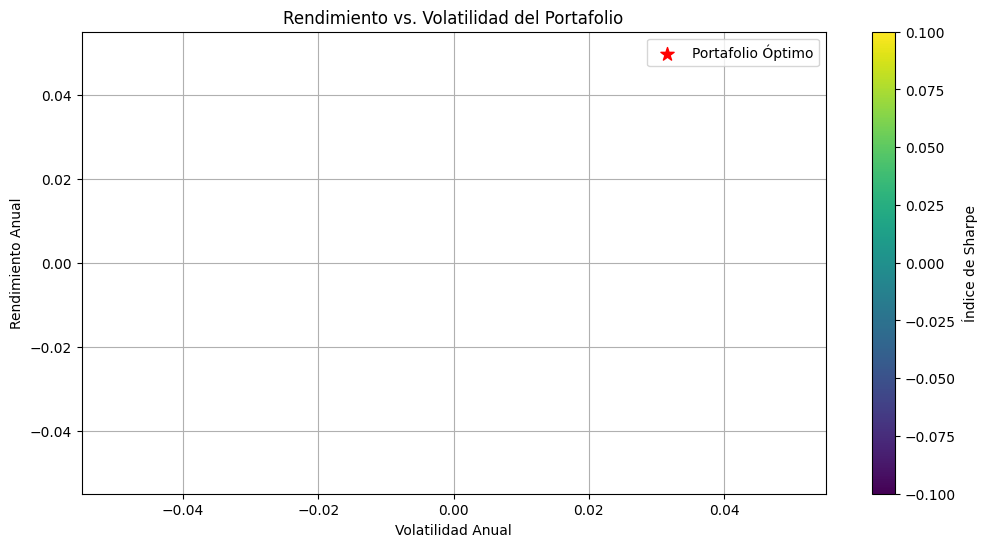

In [7]:
# Optimizar el portafolio de Markowitz
result = minimize(optimize_portfolio, initial_weights, args=(cov_matrix,),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Obtener los pesos óptimos
optimal_weights = result.x

# Rendimientos y volatilidades de portafolios generados
port_returns = []
port_volatilities = []

# Generar diferentes combinaciones de pesos y calcular rendimiento y volatilidad
for _ in range(500):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_return, port_volatility = portfolio_metrics(weights, cov_matrix)
    port_returns.append(port_return)
    port_volatilities.append(port_volatility)

# Convertir a arrays
port_returns = np.array(port_returns)
port_volatilities = np.array(port_volatilities)

# Gráfico de dispersión de rendimiento vs. volatilidad
plt.figure(figsize=(12, 6))
plt.scatter(port_volatilities, port_returns, c=port_returns / port_volatilities, marker='o')
plt.title('Rendimiento vs. Volatilidad del Portafolio')
plt.xlabel('Volatilidad Anual')
plt.ylabel('Rendimiento Anual')
plt.colorbar(label='Índice de Sharpe')
plt.grid(True)

# Calcular el rendimiento y la volatilidad del portafolio óptimo
optimal_return, optimal_volatility = portfolio_metrics(optimal_weights, cov_matrix)

# Añadir el punto del portafolio óptimo
plt.scatter(optimal_volatility, optimal_return, c='red', marker='*', s=100, label='Portafolio Óptimo')

# Mostrar la frontera eficiente
plt.plot(port_volatilities, port_returns, 'b--', linewidth=0.01)
plt.legend(labelspacing=0.8)

# Mostrar gráfico
plt.show()